In [1]:
## Import dependencies
import pandas as pd 
import numpy as np
import yfinance as yf
from flask import Flask, jsonify, render_template
from sklearn.linear_model import LinearRegression
import yfinance as yf
from pathlib import Path
from pprint import pprint

In [78]:
## matplotlib font styling for visualizations
import matplotlib.pyplot as plt

SMALLER_SIZE = 20
SMALL_SIZE = 25
MEDIUM_SIZE = 28
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Get our data: 

### - Pull historical data for the market using the yfinance python library
### - Export the market historical data to a separate csv file in the folder labeled data_history_market

In [2]:
## Pull historical data for the market (market_ticker) using the yfinance python library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
market_ticker = "^GSPC"
market_history_data_df= yf.download(tickers = market_ticker, start="2011-01-01")
market_history_df = market_history_data_df[["Close"]]
market_history_df.reset_index(level=0, inplace=True)
## Export the market historical data into it's own separate csv file
market_history_df.to_csv(f"resources/data_history_market/{market_ticker}.csv")
## Show first 5 rows of data frame
market_history_df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2011-01-03,1271.869995
1,2011-01-04,1270.199951
2,2011-01-05,1276.560059
3,2011-01-06,1273.849976
4,2011-01-07,1271.500000


### - Pull historical data for each stock (ticker) using the yfinance python library
### - Export each stock's historical data to a separate csv file in the folder labeled data_history_stocks folder

In [ ]:
##### DO NOT RUN THIS CELL UNLESS YOU NEED TO CREATE ALL THE CSVs OF HISTORICAL STOCK DATA FROM SCRACTH
##### IF YOU ALREADY HAVE THE CSVS, PLEASE SKIP THIS CELL AND RUN THE NEXT CODE CELL BELOW INSTEAD

## Pull historical data for each stock (stock_tickers) using the yfinance python library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
stock_tickers = ["ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES", "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE", "ALL", "AMZN", "AMCR", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI", "ANSS", "ANTM", "AON", "AOS", "APA", "AAPL", "AMAT", "APT", "ADM", "ANET", "AJG", "AIZ", "ATO", "ADSK", "ADP", "AZO", "AVB", "AVY", "AVGO", "BKR", "BLL", "BAC", "BK", "BAX", "BDX", "BRK.B", "BBY", "BIO", "BIIB", "BLK", "BA", "BKNG", "BWA", "BXP", "BSX", "BMY", "BR", "BF.B", "BEN", "CHRW", "COG", "CDNS", "CZR", "CPB", "COF", "CAH", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "CNC", "CNP", "CERN", "CF", "CRL", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CTXS", "CLX", "CME", "CMS", "CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "COO", "CPRT", "CTVA", "COST", "CCI", "CSX", "CMI", "CVS", "CRM", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "DVN", "DXCM", "DLR", "DFS", "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DTE", "DUK", "DRE", "DD", "DXC", "DGX", "DIS", "ED", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", "EMR", "ENPH", "ETR", "EOG", "EFX", "EQIX", "EQR", "ESS", "EL", "ETSY", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "FANG", "FFIV", "FB", "FAST", "FRT", "FDX", "FIS", "FITB", "FE", "FRC", "FISV", "FLT", "FMC", "F", "FTNT", "FTV", "FBHS", "FOXA", "FOX", "FCX", "GOOGL", "GOOG", "GLW", "GPS", "GRMN", "GNRC", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "GWW", "HAL", "HBI", "HIG", "HAS", "HCA", "HSIC", "HSY", "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ", "HUM", "HBAN", "HII", "IT", "IEX", "IDXX", "INFO", "ITW", "ILMN", "INCY", "IR", "INTC", "ICE", "IBM", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP", "IQV", "IRM", "JKHY", "J", "JBHT", "JNJ", "JCI", "JPM", "JNPR", "KMX", "KO", "KSU", "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KHC", "KR", "LNT", "LB", "LHX", "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LUMN", "LYB", "LUV", "MMM", "MO", "MTB", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NWL", "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NSC", "NTRS", "NOC", "NLOK", "NCLH", "NOV", "NRG", "NUE", "NVDA", "NVR", "NXPI", "NOW", "ORLY", "OXY", "ODFL", "OMC", "OKE", "ORCL", "OTIS", "O", "PEAK", "PCAR", "PKG", "PH", "PAYX", "PAYC", "PYPL", "PENN", "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PTC", "PEG", "PSA", "PHM", "PVH", "PWR", "QRVO", "QCOM", "RE", "RL", "RJF", "RTX", "REG", "REGN", "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "SCHW", "STZ", "SJM", "SPGI", "SBAC", "SLB", "STX", "SEE", "SRE", "SHW", "SPG", "SWKS", "SNA", "SO", "SWK", "SBUX", "STT", "STE", "SYK", "SIVB", "SYF", "SNPS", "SYY", "T", "TAP", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "TDY", "TFX", "TER", "TSLA", "TXN", "TXT", "TMO", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TWTR", "TYL", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL", "UNH", "UPS", "URI", "UHS", "UNM", "VLO", "VTR", "VRSN", "VRSK", "VZ", "VRTX", "VFC", "VIAC", "VTRS", "V", "VNO", "VMC", "WRB", "WAB", "WMT", "WBA", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WU", "WRK", "WY", "WHR", "WMB", "WLTW", "WYNN", "XRAY", "XOM", "XEL", "XLNX", "XYL", "YUM", "ZBRA", "ZBH", "ZION", "ZTS"]
for stock_ticker in stock_tickers:
    stock_history_data_df= yf.download(tickers = stock_ticker, start="2011-01-01")
    stock_history_df = stock_history_data_df[["Close"]]
    stock_history_df.reset_index(level=0, inplace=True)
    ## Export each stock's historical data into it's own separate csv file
    stock_history_df.to_csv(f"resources/data_history_stocks/{stock_ticker}.csv")
    

In [3]:
#### Run this cell if you aren't running the cell above
stock_tickers = ["ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES", "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE", "ALL", "AMZN", "AMCR", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI", "ANSS", "ANTM", "AON", "AOS", "APA", "AAPL", "AMAT", "APT", "ADM", "ANET", "AJG", "AIZ", "ATO", "ADSK", "ADP", "AZO", "AVB", "AVY", "AVGO", "BKR", "BLL", "BAC", "BK", "BAX", "BDX", "BRK.B", "BBY", "BIO", "BIIB", "BLK", "BA", "BKNG", "BWA", "BXP", "BSX", "BMY", "BR", "BF.B", "BEN", "CHRW", "COG", "CDNS", "CZR", "CPB", "COF", "CAH", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "CNC", "CNP", "CERN", "CF", "CRL", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CTXS", "CLX", "CME", "CMS", "CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "COO", "CPRT", "CTVA", "COST", "CCI", "CSX", "CMI", "CVS", "CRM", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "DVN", "DXCM", "DLR", "DFS", "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DTE", "DUK", "DRE", "DD", "DXC", "DGX", "DIS", "ED", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", "EMR", "ENPH", "ETR", "EOG", "EFX", "EQIX", "EQR", "ESS", "EL", "ETSY", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "FANG", "FFIV", "FB", "FAST", "FRT", "FDX", "FIS", "FITB", "FE", "FRC", "FISV", "FLT", "FMC", "F", "FTNT", "FTV", "FBHS", "FOXA", "FOX", "FCX", "GOOGL", "GOOG", "GLW", "GPS", "GRMN", "GNRC", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "GWW", "HAL", "HBI", "HIG", "HAS", "HCA", "HSIC", "HSY", "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ", "HUM", "HBAN", "HII", "IT", "IEX", "IDXX", "INFO", "ITW", "ILMN", "INCY", "IR", "INTC", "ICE", "IBM", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP", "IQV", "IRM", "JKHY", "J", "JBHT", "JNJ", "JCI", "JPM", "JNPR", "KMX", "KO", "KSU", "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KHC", "KR", "LNT", "LB", "LHX", "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LUMN", "LYB", "LUV", "MMM", "MO", "MTB", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NWL", "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NSC", "NTRS", "NOC", "NLOK", "NCLH", "NOV", "NRG", "NUE", "NVDA", "NVR", "NXPI", "NOW", "ORLY", "OXY", "ODFL", "OMC", "OKE", "ORCL", "OTIS", "O", "PEAK", "PCAR", "PKG", "PH", "PAYX", "PAYC", "PYPL", "PENN", "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PTC", "PEG", "PSA", "PHM", "PVH", "PWR", "QRVO", "QCOM", "RE", "RL", "RJF", "RTX", "REG", "REGN", "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "SCHW", "STZ", "SJM", "SPGI", "SBAC", "SLB", "STX", "SEE", "SRE", "SHW", "SPG", "SWKS", "SNA", "SO", "SWK", "SBUX", "STT", "STE", "SYK", "SIVB", "SYF", "SNPS", "SYY", "T", "TAP", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "TDY", "TFX", "TER", "TSLA", "TXN", "TXT", "TMO", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TWTR", "TYL", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL", "UNH", "UPS", "URI", "UHS", "UNM", "VLO", "VTR", "VRSN", "VRSK", "VZ", "VRTX", "VFC", "VIAC", "VTRS", "V", "VNO", "VMC", "WRB", "WAB", "WMT", "WBA", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WU", "WRK", "WY", "WHR", "WMB", "WLTW", "WYNN", "XRAY", "XOM", "XEL", "XLNX", "XYL", "YUM", "ZBRA", "ZBH", "ZION", "ZTS"]

## Calculate linear regression for market
### Market ticker symbol: ^GSPC

In [4]:
## Create path to sp500 csv and import data to dataframe
market_path = "resources/data_history_market/^GSPC.csv"
market_df = pd.read_csv(market_path)
## Rename index column from 'Unnamed: 0' to 'Day Number' 
    ##(header for index is blank in csv file, couldn't figure out how to fix in initial loop before exporting data to CSVs)
## Rename closing price column from 'Close' to 'Price'
market_df.rename(columns={"Unnamed: 0": "Day Number", 
                          "Date": "Date", 
                          "Close": "Price"}, inplace = True)
## Show first 5 rows of data frame
market_df.head()

,Day Number,Date,Price
0,0,2011-01-03,1271.869995
1,1,2011-01-04,1270.199951
2,2,2011-01-05,1276.560059
3,3,2011-01-06,1273.849976
4,4,2011-01-07,1271.500000


In [5]:
## Create path to historical market data
market_file = "resources/data_history_market/^GSPC.csv"
## Use linear regression to find slope and y intercept of sp500 data
market_model = LinearRegression()
market_model.fit(np.array(market_df["Day Number"]).reshape(-1,1), market_df["Price"])
market_slope = market_model.coef_
market_intercept = market_model.intercept_
market_score = market_model.score(np.array(market_df["Day Number"]).reshape(-1,1), market_df["Price"])
market_file_name = str(market_file).replace("^GSPC", "Market").replace(".csv","").replace("resources/data_history_market/","")
#print(f"{file_name}: y = {(slope)}x + {intercept}")
print(f"{market_file_name}: slope = {market_slope}: y-intercept = {market_intercept}: score = {market_score}")

Market: slope = [0.91567333]: y-intercept = 1044.2083132335301: score = 0.9305977469097396


In [6]:
## Calculate regression line of market
market_regression = [market_slope * day + market_intercept for day in market_df["Day Number"]]

In [7]:
# ## Plot market data without regression line
# plt.figure(figsize=(30,15))
# plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad", linewidth=5)

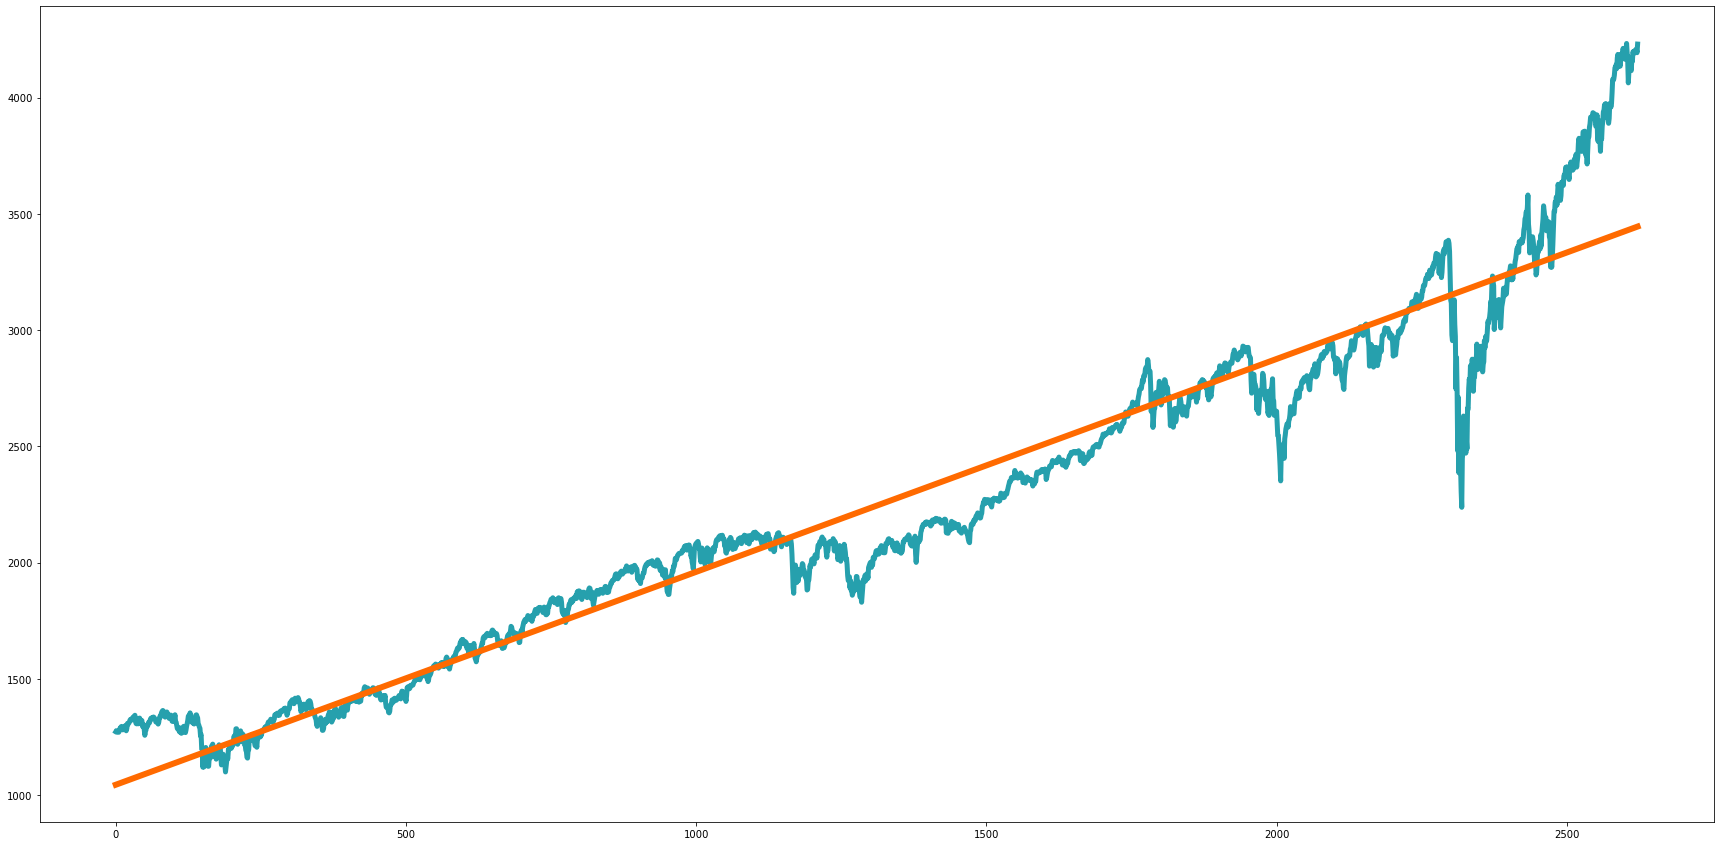

In [8]:
## Plot market data and market regression line and save graph to image file
plt.figure(figsize=(30,15))
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad", linewidth=5)
plt.plot(market_df["Day Number"], market_regression, c="#ff6a00", linewidth=6)
###### Will need to format graph and save to image file ######
# plt.savefig("static/img/data_history_reg_market.png")
# plt.show()

In [9]:
## Market Regression CSV
## note: market_reg is a list of values
market_reg_raw_df = pd.DataFrame(market_regression)
market_reg_raw_df.to_csv("resources/data_results/scratch/market_reg_raw_df.csv")
market_reg_raw_path = "resources/data_results/scratch/market_reg_raw_df.csv"
market_reg_df = pd.read_csv(market_reg_raw_path)
del market_reg_df['Unnamed: 0']
market_reg_df.rename(columns={"0": "Regression"}, inplace = True)
market_reg_df.to_csv("resources/data_results/market/market_regression.csv")

## Calculate linear regressions: slopes, y-intercepts, and scores
### - Loop through all csvs in data_stocks_history folder

In [10]:
## Create empty lists to store various results/outputs
allstocks_tickerlist = []
winningstocks_tickerlist = []
losingstocks_tickerlist = []
worststocks_tickerlist = []
runnerupstocks_tickerlist = []

allstocks_modelvalues = []
winningstocks_modelvalues = []
losingstocks_modelvalues = []
worststocks_modelvalues = []
runnerupstocks_modelvalues = []

allstocks_regressionlist = []
winningstocks_regressionlist = []
losingstocks_regressionlist = []
worststocks_regressionlist = []
runnerupstocks_regressionlist = []

In [11]:
## Define error log file
error_log = open("errors.log", "a")
error_count = 0
## Use pathlib to loop through all csvs in data_tickers folder 
folder = "resources/data_history_stocks"
for file in Path(folder).glob("*.csv"):
    ## Create empty lists to store slopes for all stocks, winning stocks, and losing stocks
    try:
        stock_df = pd.read_csv(file)
        stock_df.rename(columns={"Unnamed: 0": "Day Number", 
                                 "Date": "Date", 
                                 "Close": "Price"}, inplace = True)
        ## Use linear regression to find slope, y intercept, and regression of historical market data
        stock_model = LinearRegression()
        stock_model.fit(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        stock_slope = stock_model.coef_
        stock_intercept = stock_model.intercept_
        stock_score = stock_model.score(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
        #print(f"{file_name}: y = {(slope)}x + {intercept}")
        #print(f"{file_name}: slope = {(stock_slope)}: score = {stock_score}")
        ## Calculate regression line of stocks
        ## Append all stock results to lists
        allstocks_modelvalues.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
       # all_stocks_list.append({"Stock": file_name})
        allstocks_tickerlist.append(file_name)
        
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1
     ## If else for winning stocks
    if stock_slope > market_slope:
        winningstocks_modelvalues.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
        winningstocks_tickerlist.append(file_name)
    else:
        losingstocks_modelvalues.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
        losingstocks_tickerlist.append(file_name)
        
# error_log.close()
# print(f"Encountered {error_count} errors")

In [12]:
# del winning_stocks_list
# del losing_stocks_list
# del all_stocks_list
winningstocks_tickerlist

['AMZN', 'NVR']

In [13]:
## Load all_stocks_results (list of dictionaries) into a Data Frame
allstocks_modelvalues_df = pd.DataFrame(allstocks_modelvalues)
## Export all_stocks_results data frame into it's own separate csv file
allstocks_modelvalues_df.to_csv("resources/data_results/all_stocks/allstocks_modelvalues.csv")
## Show first 5 rows of new dataframe
allstocks_modelvalues_df.head()

,Stock,Slope,Y-intercept,Score
0,A,[0.030670449470024706],13.859910,0.812693
1,AAL,[0.006599130718557561],20.473385,0.112110
2,AAP,[0.037212528093538366],76.996240,0.527757
3,AAPL,[0.033017379653274524],-3.322469,0.690018
4,ABBV,[0.028137085222355175],42.528080,0.734616


In [14]:
## Load winning_stocks_results (list of dictionaries) into a Data Frame
winningstocks_modelvalues_df = pd.DataFrame(winningstocks_modelvalues)
## Export winning_stocks_results data frame into it's own separate csv file
winningstocks_modelvalues_df.to_csv("resources/data_results/winning_stocks/winningstocks_modelvalues.csv")
## Show first 5 rows of new dataframe
winningstocks_modelvalues_df.head()

,Stock,Slope,Y-intercept,Score
0,AMZN,[1.10484758236394],-424.405852,0.820469
1,NVR,[1.4741055836098944],82.811433,0.885639


In [15]:
# ## Load losing_stocks_results (list of dictionaries) into a Data Frame
losingstocks_modelvalues_df = pd.DataFrame(losingstocks_modelvalues)
## Export losing_stocks_results data frame into it's own separate csv file
losingstocks_modelvalues_df.to_csv("resources/data_results/losing_stocks/losingstocks_modelvalues.csv")
## Show first 5 rows of new dataframe
losingstocks_modelvalues_df.head()

,Stock,Slope,Y-intercept,Score
0,A,[0.030670449470024706],13.859910,0.812693
1,AAL,[0.006599130718557561],20.473385,0.112110
2,AAP,[0.037212528093538366],76.996240,0.527757
3,AAPL,[0.033017379653274524],-3.322469,0.690018
4,ABBV,[0.028137085222355175],42.528080,0.734616


In [16]:
## Grab the 10 worst stocks and put results into their own Data Frame
# Sorting the DataFrame based on "Slope" column
# Will sort from lowest to highest if no other parameter is passed
worststocks_modelvalues_df = allstocks_modelvalues_df.sort_values("Slope")
# Reset the index so that the index is now based on the sorting locations
worststocks_modelvalues_df = worststocks_modelvalues_df.reset_index(drop=True)
## Drop all rows except first 10
worststocks_modelvalues_df.drop(worststocks_modelvalues_df.index[10:], inplace=True)
## Export worst_stocks_results data frame into it's own separate csv file
worststocks_modelvalues_df.to_csv("resources/data_results/worst_stocks/worststocks_modelvalues.csv")
## Show new dataframe
worststocks_modelvalues_df 

,Stock,Slope,Y-intercept,Score
0,KHC,[-0.0469475987545335],93.423922,0.743632
1,APA,[-0.03836289644231998],109.366525,0.893787
2,PRGO,[-0.031489714593205896],138.970503,0.341416
3,RL,[-0.027683557817582288],161.007197,0.426460
4,IBM,[-0.02747376199598605],196.076844,0.659919
5,OXY,[-0.025684003928287662],102.662212,0.690018
6,NOV,[-0.02443139152123535],76.918339,0.794237
7,DVN,[-0.02396731419480716],76.980977,0.806010
8,SLB,[-0.023715273424911948],97.841726,0.574901
9,MOS,[-0.019367781037619613],63.621256,0.791186


In [17]:
## Grab values in Stock column of Runnerup Stocks DF and append values to list 
#### Hopefully will use list to loop thru and calc regressions and make csv for each stock
worststocks_tickerlist = worststocks_modelvalues_df['Stock'].tolist()
worststocks_tickerlist

['KHC', 'APA', 'PRGO', 'RL', 'IBM', 'OXY', 'NOV', 'DVN', 'SLB', 'MOS']

In [18]:
## Grab the 10 runner-up stock results and put into their own Data Frame
runnerupstocks_modelvalues_df = losingstocks_modelvalues_df.sort_values("Slope",ascending=False)
## Reset the index so that the index is now based on the sorting locations
runnerupstocks_modelvalues_df = runnerupstocks_modelvalues_df.reset_index(drop=True)
## Drop all rows except first 10
runnerupstocks_modelvalues_df.drop(runnerupstocks_modelvalues_df.index[10:], inplace=True)
## Export runnerup_stocks_results data frame into it's own separate csv file
runnerupstocks_modelvalues_df.to_csv("resources/data_results/runnerup_stocks/runnerupstocks_modelvalues.csv")
## Show new dataframe
runnerupstocks_modelvalues_df 

,Stock,Slope,Y-intercept,Score
0,BKNG,[0.666985934307855],479.268036,0.868494
1,GOOG,[0.578607344181096],62.469546,0.879429
2,GOOGL,[0.5770421106694515],71.230727,0.888064
3,AZO,[0.3601499112448349],216.480412,0.859887
4,MTD,[0.34917389316160735],-0.623806,0.863670
5,CMG,[0.26945917065636243],213.881891,0.469004
6,ISRG,[0.24083591424045958],-3.674168,0.808996
7,EQIX,[0.23739802442596358],33.465533,0.909350
8,CHTR,[0.21617259994661445],-27.561158,0.902055
9,PAYC,[0.20991896009878094],-55.343142,0.841577


In [19]:
## Grab values in Stock column of Runnerup Stocks DF and append values to list 
runnerupstocks_tickerlist = runnerupstocks_modelvalues_df['Stock'].tolist()
runnerupstocks_tickerlist

['BKNG', 'GOOG', 'GOOGL', 'AZO', 'MTD', 'CMG', 'ISRG', 'EQIX', 'CHTR', 'PAYC']

### Calculate Regression Lines For Each Stock: 
##### - Calculate regression lines for eah Stock, save regression line data points to DataFrame, then export DataFrame to csv

In [20]:
## Regression Lines For each stock in all stocks
for file in Path(folder).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in allstocks_tickerlist:
            #print(file_name)
            allstocks_regloop_df = pd.read_csv(file)
            allstocks_regloop_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                 "Date": "Date", 
                                                 "Close": "Price"}, inplace = True)
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            allstocks_model = LinearRegression()
            allstocks_model.fit(np.array(allstocks_regloop_df["Day Number"]).reshape(-1,1), allstocks_regloop_df["Price"])
            allstocks_slope = allstocks_model.coef_
            allstocks_intercept = allstocks_model.intercept_
            allstocks_score = allstocks_model.score(np.array(allstocks_regloop_df["Day Number"]).reshape(-1,1), allstocks_regloop_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            allstocks_regression = [allstocks_slope * day + allstocks_intercept for day in allstocks_regloop_df["Day Number"]]
            allstocks_regressionlist.append({"Stock": file_name, "Slope": allstocks_slope, "Y-intercept": allstocks_intercept, "Score": allstocks_score})
           # all_stocks_list.append({"Stock": file_name})
            #all_stocks_list.append(file_name)
            
            ## Winning_Stocks Regression DataFrame, export as CSV file
            allstocks_reg_raw_df = pd.DataFrame(allstocks_regression)
            allstocks_reg_raw_df.to_csv(f"resources/data_results/scratch/all_stock_reg_raw_df_{file_name}.csv")
            allstocks_reg_raw_path = f"resources/data_results/scratch/all_stock_reg_raw_df_{file_name}.csv"
            allstocks_reg_df = pd.read_csv(allstocks_reg_raw_path)
            del allstocks_reg_df['Unnamed: 0']
            allstocks_reg_df.rename(columns={"0": "Regression"}, inplace = True)
            allstocks_reg_df.to_csv(f"resources/data_results/all_stocks/{file_name}_regression.csv")
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


### Calculate Regression Lines For each Winning Stock: 
##### - Calculate regression lines for eah for the Winning Stocks, save regression line data points to DataFrame, then export DataFrame to csv

In [21]:

for file in Path(folder).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in winningstocks_tickerlist:
            print(file_name)
            winningstocks_regloop_df = pd.read_csv(file)
            winningstocks_regloop_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                     "Date": "Date", 
                                                     "Close": "Price"}, inplace = True)
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            winningstocks_model = LinearRegression()
            winningstocks_model.fit(np.array(winningstocks_regloop_df["Day Number"]).reshape(-1,1), winningstocks_regloop_df["Price"])
            winningstocks_slope = winningstocks_model.coef_
            winningstocks_intercept = winningstocks_model.intercept_
            winningstocks_score = winningstocks_model.score(np.array(winningstocks_regloop_df["Day Number"]).reshape(-1,1), winningstocks_regloop_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            winningstocks_regression = [winningstocks_slope * day + winningstocks_intercept for day in winningstocks_regloop_df["Day Number"]]
            winningstocks_regressionlist.append({"Stock": file_name, "Slope": winningstocks_slope, "Y-intercept": winningstocks_intercept, "Score": winningstocks_score})
           # all_stocks_list.append({"Stock": file_name})
            #all_stocks_list.append(file_name)
            
            ## Winning_Stocks Regression DataFrame, export as CSV file
            winningstocks_reg_raw_df = pd.DataFrame(winningstocks_regression)
            winningstocks_reg_raw_df.to_csv(f"resources/data_results/scratch/win_stock_reg_raw_df_{file_name}.csv")
            winningstocks_reg_raw_path = f"resources/data_results/scratch/win_stock_reg_raw_df_{file_name}.csv"
            winningstocks_reg_df = pd.read_csv(winningstocks_reg_raw_path)
            del winningstocks_reg_df['Unnamed: 0']
            winningstocks_reg_df.rename(columns={"0": "Regression"}, inplace = True)
            winningstocks_reg_df.to_csv(f"resources/data_results/winning_stocks/{file_name}_regression.csv")
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


AMZN
NVR


In [22]:

# winningstocks_regressionlist = []

# del winningstocks_regression
# del winningstocks_regressionlist

# winningstocks_regressionlist

### Calculate Regression Lines For each Top 10 Runner-Up Stock: 
##### - Calculate regression lines for eah for the Runner-Up Stocks, save regression line data points to DataFrame, then export DataFrame to csv

In [23]:
## Regression Lines For each Top 10 Runner-Up Stock
for file in Path(folder).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in runnerupstocks_tickerlist:
            print(file_name)
            runnerupstocks_regloop_df = pd.read_csv(file)
            runnerupstocks_regloop_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                      "Date": "Date", 
                                                      "Close": "Price"}, inplace = True)
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            runnerupstocks_model = LinearRegression()
            runnerupstocks_model.fit(np.array(runnerupstocks_regloop_df["Day Number"]).reshape(-1,1), runnerupstocks_regloop_df["Price"])
            runnerupstocks_slope = runnerupstocks_model.coef_
            runnerupstocks_intercept = runnerupstocks_model.intercept_
            runnerupstocks_score = runnerupstocks_model.score(np.array(runnerupstocks_regloop_df["Day Number"]).reshape(-1,1), runnerupstocks_regloop_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            runnerupstocks_regression = [runnerupstocks_slope * day + runnerupstocks_intercept for day in runnerupstocks_regloop_df["Day Number"]]
            runnerupstocks_regressionlist.append({"Stock": file_name, "Slope": runnerupstocks_slope, "Y-intercept": runnerupstocks_intercept, "Score": runnerupstocks_score})
           # all_stocks_list.append({"Stock": file_name})
            #all_stocks_list.append(file_name)
            
            ## Winning_Stocks Regression DataFrame, export as CSV file
            runnerupstocks_reg_raw_df = pd.DataFrame(runnerupstocks_regression)
            runnerupstocks_reg_raw_df.to_csv(f"resources/data_results/scratch/run_stock_reg_raw_df_{file_name}.csv")
            runnerupstocks_reg_raw_path = f"resources/data_results/scratch/run_stock_reg_raw_df_{file_name}.csv"
            runnerupstocks_reg_df = pd.read_csv(runnerupstocks_reg_raw_path)
            del runnerupstocks_reg_df['Unnamed: 0']
            runnerupstocks_reg_df.rename(columns={"0": "Regression"}, inplace = True)
            runnerupstocks_reg_df.to_csv(f"resources/data_results/runnerup_stocks/{file_name}_regression.csv")
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1

   

AZO
BKNG
CHTR
CMG
EQIX
GOOG
GOOGL
ISRG
MTD
PAYC


### Calculate Regression Lines For each Bottom 10 Worst Stock: 
##### - Calculate regression lines for eah for the Worst Stocks, save regression line data points to DataFrame, then export DataFrame to csv

In [24]:
## Regression Lines For each Bottom 10 Worst Stock
for file in Path(folder).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in worststocks_tickerlist:
            print(file_name)
            worststocks_regloop_df = pd.read_csv(file)
            worststocks_regloop_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                   "Date": "Date", 
                                                   "Close": "Price"}, inplace = True)
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            worststocks_model = LinearRegression()
            worststocks_model.fit(np.array(worststocks_regloop_df["Day Number"]).reshape(-1,1), worststocks_regloop_df["Price"])
            worststocks_slope = worststocks_model.coef_
            worststocks_intercept = worststocks_model.intercept_
            worststocks_score = worststocks_model.score(np.array(worststocks_regloop_df["Day Number"]).reshape(-1,1), worststocks_regloop_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            worststocks_regression = [worststocks_slope * day + worststocks_intercept for day in worststocks_regloop_df["Day Number"]]
            worststocks_regressionlist.append({"Stock": file_name, "Slope": worststocks_slope, "Y-intercept": worststocks_intercept, "Score": worststocks_score})
           # all_stocks_list.append({"Stock": file_name})
            #all_stocks_list.append(file_name)
            
            ## Winning_Stocks Regression DataFrame, export as CSV file
            worststocks_reg_raw_df = pd.DataFrame(worststocks_regression)
            worststocks_reg_raw_df.to_csv(f"resources/data_results/scratch/worst_stock_reg_raw_df_{file_name}.csv")
            worststocks_reg_raw_path = f"resources/data_results/scratch/worst_stock_reg_raw_df_{file_name}.csv"
            worststocks_reg_df = pd.read_csv(worststocks_reg_raw_path)
            del worststocks_reg_df['Unnamed: 0']
            worststocks_reg_df.rename(columns={"0": "Regression"}, inplace = True)
            worststocks_reg_df.to_csv(f"resources/data_results/worst_stocks/{file_name}_regression.csv")
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


APA
DVN
IBM
KHC
MOS
NOV
OXY
PRGO
RL
SLB


In [25]:
### testing to make sure for loop is correctly calculating regression for each winning stock
## Create path to historical AMZN stock data
AMZN_file = "resources/data_history_stocks/AMZN.csv"
AMZN_df = pd.read_csv(AMZN_file)
AMZN_df.rename(columns={"Unnamed: 0": "Day Number", 
                         "Date": "Date", 
                         "Close": "Price"}, inplace = True)
## Use linear regression to find slope and y intercept of AMZN data
AMZN_model = LinearRegression()
AMZN_model.fit(np.array(AMZN_df["Day Number"]).reshape(-1,1), AMZN_df["Price"])
AMZN_slope = AMZN_model.coef_
AMZN_intercept = AMZN_model.intercept_
AMZN_score = AMZN_model.score(np.array(AMZN_df["Day Number"]).reshape(-1,1), AMZN_df["Price"])
AMZN_file_name = str(AMZN_file).replace("AMZN", "AMZN").replace(".csv","").replace("resources/data_history_stocks/","")
print(f"{AMZN_file_name}: slope = {AMZN_slope}: y-intercept = {AMZN_intercept} score = {AMZN_score}")

AMZN: slope = [1.10484758]: y-intercept = -424.40585197869973 score = 0.8204691023769453


In [ ]:
## Regression Lines For each Bottom 10 Worst Stock
for file in Path(folder).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in worststocks_tickerlist:
            print(file_name)
            worststocks_regloop_df = pd.read_csv(file)
            worststocks_regloop_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                   "Date": "Date", 
                                                   "Close": "Price"}, inplace = True)
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            worststocks_model = LinearRegression()
            worststocks_model.fit(np.array(worststocks_regloop_df["Day Number"]).reshape(-1,1), worststocks_regloop_df["Price"])
            worststocks_slope = worststocks_model.coef_
            worststocks_intercept = worststocks_model.intercept_
            worststocks_score = worststocks_model.score(np.array(worststocks_regloop_df["Day Number"]).reshape(-1,1), worststocks_regloop_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            worststocks_regression = [worststocks_slope * day + worststocks_intercept for day in worststocks_regloop_df["Day Number"]]
            worststocks_regressionlist.append({"Stock": file_name, "Slope": worststocks_slope, "Y-intercept": worststocks_intercept, "Score": worststocks_score})
           # all_stocks_list.append({"Stock": file_name})
            #all_stocks_list.append(file_name)
            
            ## Winning_Stocks Regression DataFrame, export as CSV file
            worststocks_reg_raw_df = pd.DataFrame(worststocks_regression)
            worststocks_reg_raw_df.to_csv(f"resources/data_results/scratch/worst_stock_reg_raw_df_{file_name}.csv")
            worststocks_reg_raw_path = f"resources/data_results/scratch/worst_stock_reg_raw_df_{file_name}.csv"
            worststocks_reg_df = pd.read_csv(worststocks_reg_raw_path)
            del worststocks_reg_df['Unnamed: 0']
            worststocks_reg_df.rename(columns={"0": "Regression"}, inplace = True)
            worststocks_reg_df.to_csv(f"resources/data_results/worst_stocks/{file_name}_regression.csv")
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


### On one graph for each Winning Stocks, plot:
#### - Historical Stock Data and Stock Regression line 
#### - Historical Market Data and Market Regression line

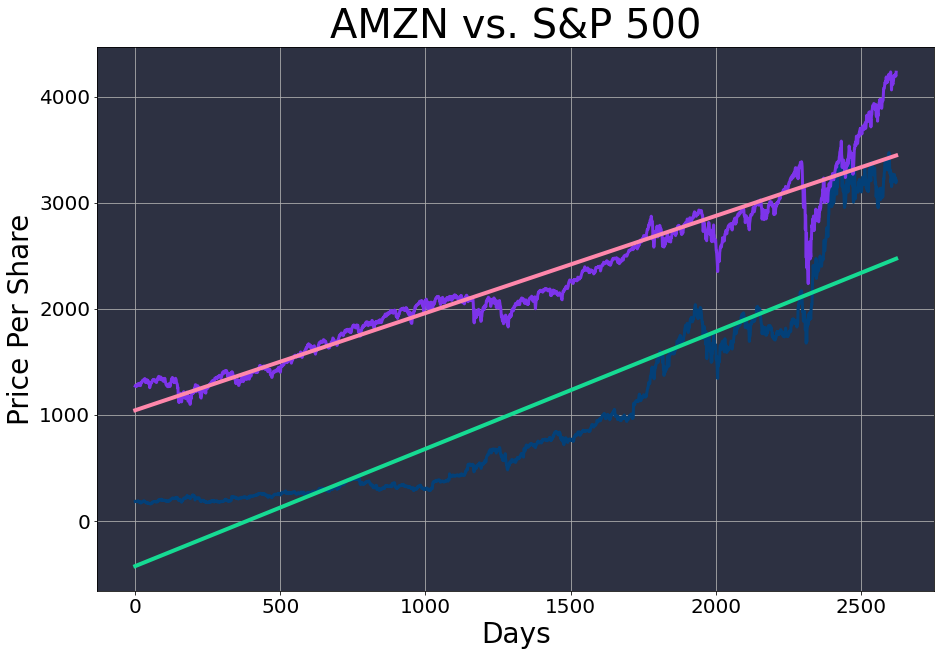

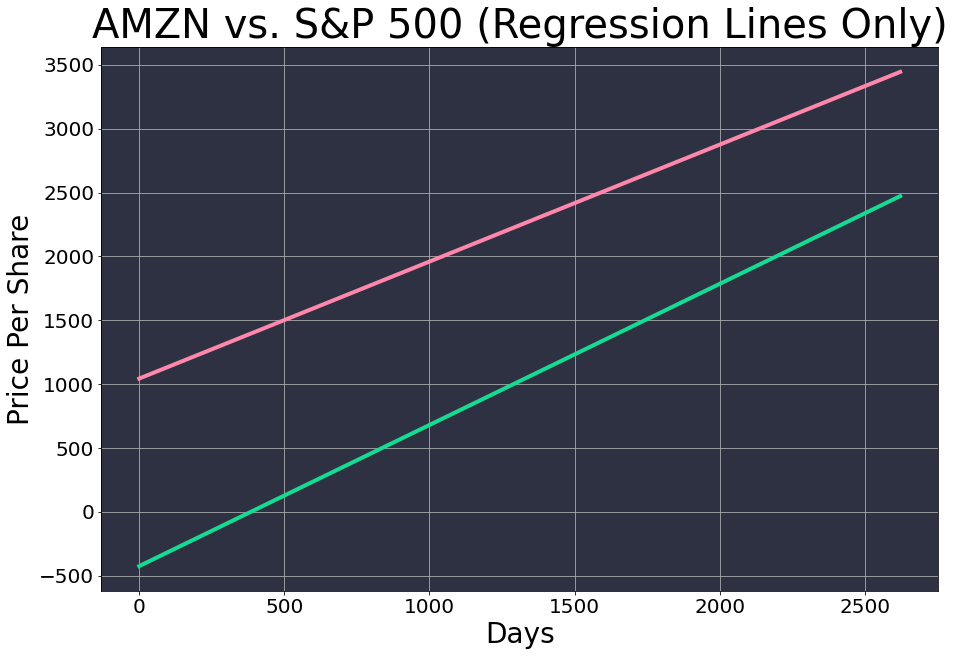

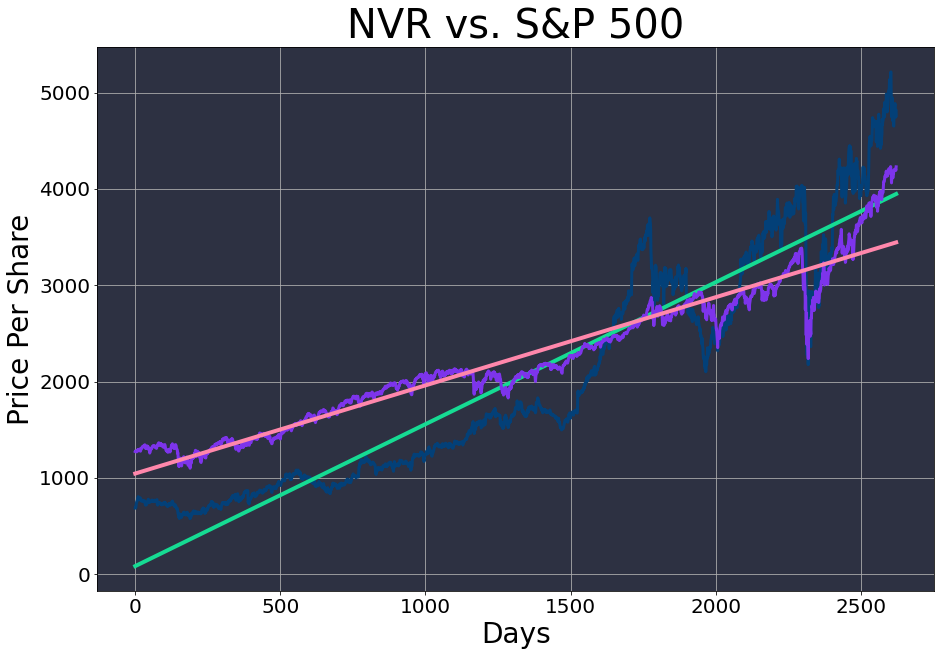

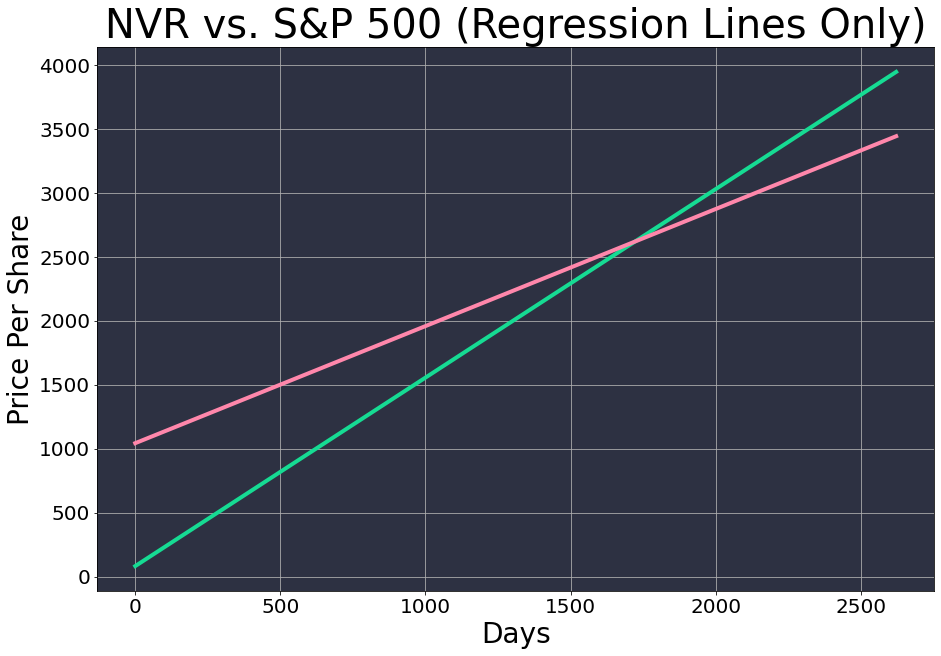

In [90]:
### PLOTS FOR WINNING STOCKS
folder_stocks = "resources/data_history_stocks"
folder_market = "resources/data_history_market"

for file in Path(folder_stocks).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in winningstocks_tickerlist:
            winningstocks_plots_df = pd.read_csv(file)
            winningstocks_plots_df.rename(columns={"Unnamed: 0": "Day Number", 
                                                   "Date": "Date", 
                                                   "Close": "Price"}, inplace = True)
            winningstocks_plots_model = LinearRegression()
            winningstocks_plots_model.fit(np.array(winningstocks_plots_df["Day Number"]).reshape(-1,1), winningstocks_plots_df["Price"])
            winningstocks_plots_slope = winningstocks_plots_model.coef_
            winningstocks_plots_intercept = winningstocks_plots_model.intercept_
            winningstocks_plots_score = winningstocks_plots_model.score(np.array(winningstocks_plots_df["Day Number"]).reshape(-1,1), winningstocks_plots_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            winningstocks_regression = [winningstocks_plots_slope * day + winningstocks_plots_intercept for day in winningstocks_plots_df["Day Number"]]
            ## Plot data and save graph to image file
            plt.figure(figsize=(15,10))
            ax = plt.axes()
            # Setting the background color
            ax.set_facecolor("#2d3142")
            plt.plot(winningstocks_plots_df["Day Number"], winningstocks_plots_df["Price"], c="#034078", linewidth=3)
            plt.plot(winningstocks_plots_df["Day Number"], winningstocks_regression, c="#16db93", linewidth=4)
            plt.plot(market_df["Day Number"], market_df["Price"], c="#7d34eb", linewidth=3)
            plt.plot(market_df["Day Number"], market_regression, c="#ff87ab", linewidth=4)
            plt.title(f"{file_name} vs. S&P 500")
            plt.xlabel("Days")
            plt.ylabel("Price Per Share")
            plt.grid()
            plt.savefig(f"static/img/winning_stocks/{file_name}_plot.png")
            plt.show()
            
            ## Plot regression lines only 
            plt.figure(figsize=(15,10))
            ax = plt.axes()
            # Setting the background color
            ax.set_facecolor("#2d3142")
            plt.plot(winningstocks_plots_df["Day Number"], winningstocks_regression, c="#16db93", linewidth=4)
            plt.plot(market_df["Day Number"], market_regression, c="#ff87ab", linewidth=4)
            plt.title(f"{file_name} vs. S&P 500 (Regression Lines Only)")
            plt.xlabel("Days")
            plt.ylabel("Price Per Share")
            plt.grid()
            plt.savefig(f"static/img/winning_stocks/{file_name}_plot_regressions_only.png")
            plt.show()
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


### On one graph for each 10 Runner-up Stocks, plot:
#### - Historical Stock Data and Stock Regression line 
#### - Historical Market Data and Market Regression line

No handles with labels found to put in legend.


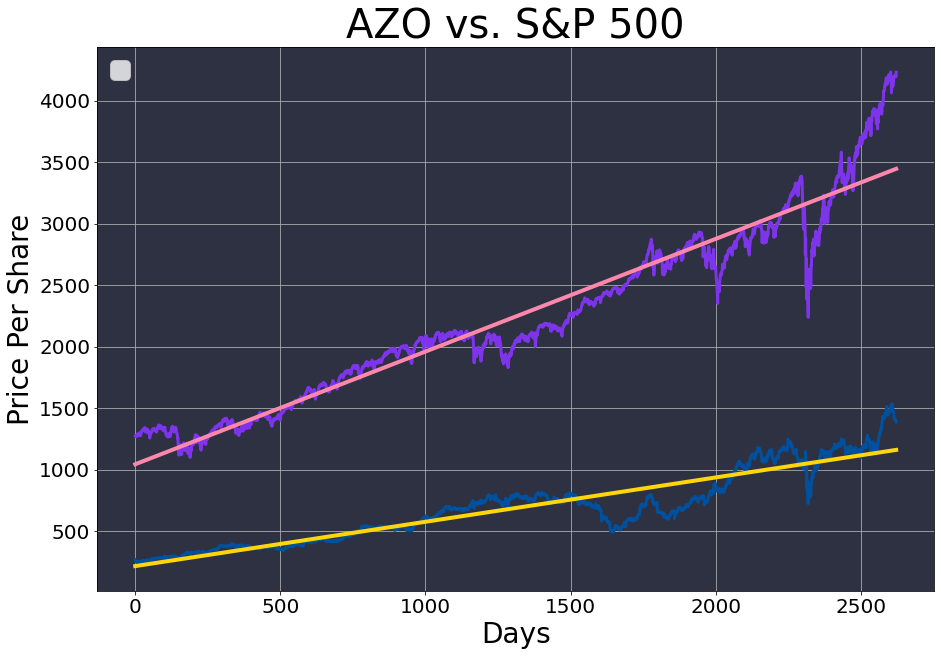

No handles with labels found to put in legend.


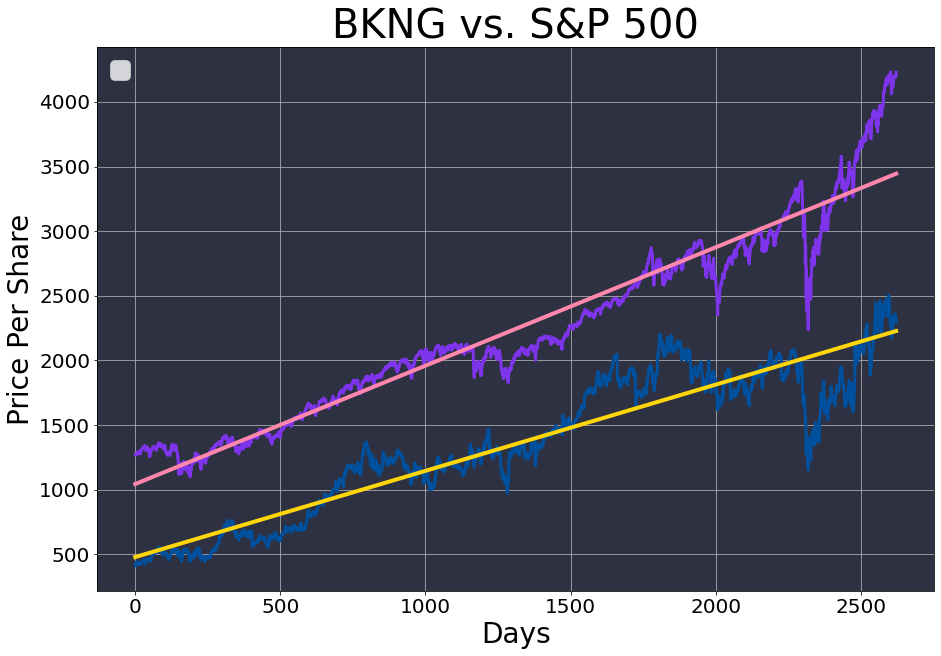

No handles with labels found to put in legend.


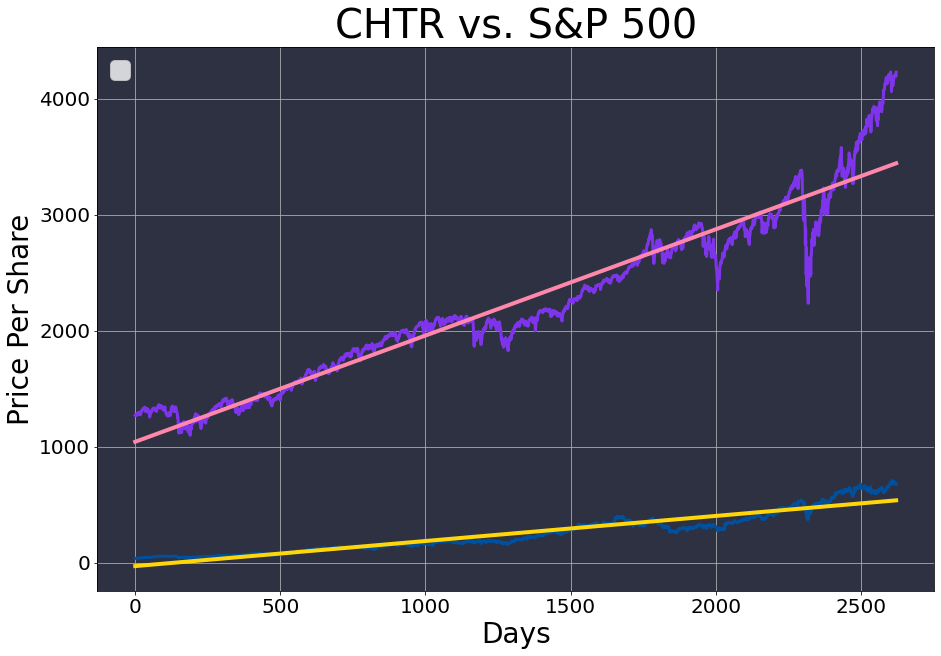

No handles with labels found to put in legend.


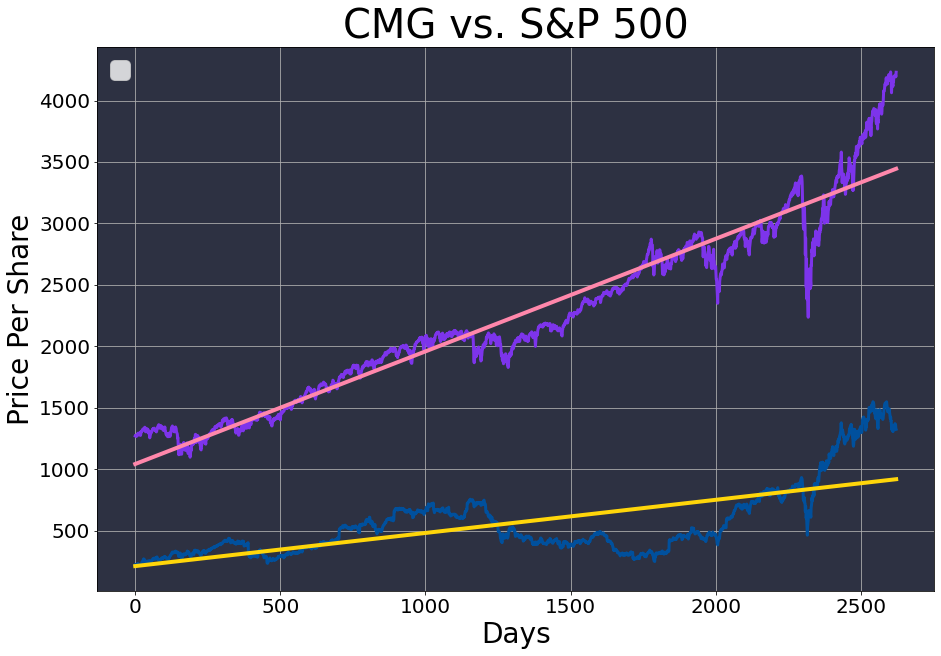

No handles with labels found to put in legend.


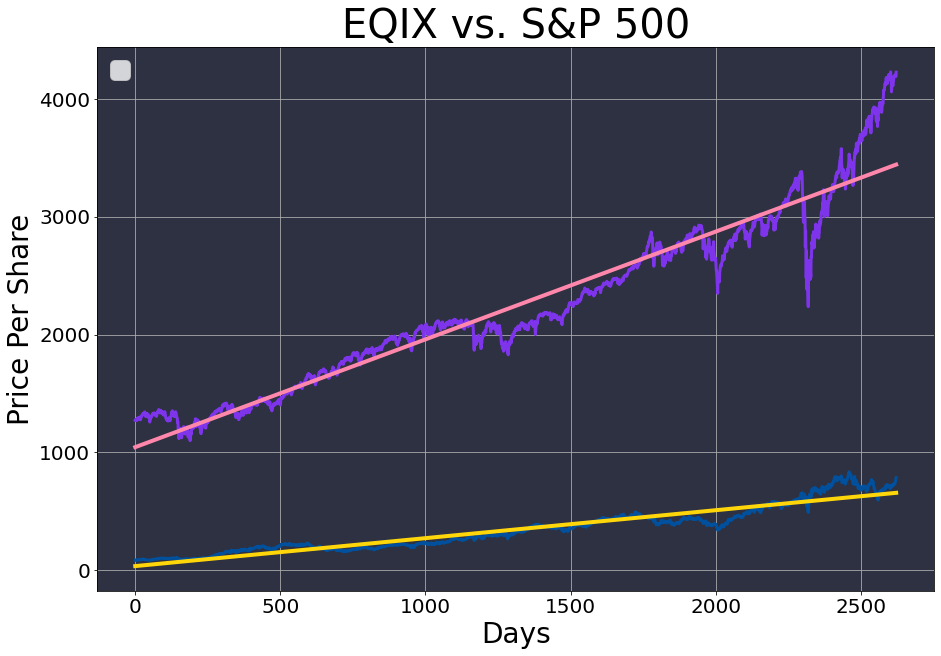

No handles with labels found to put in legend.


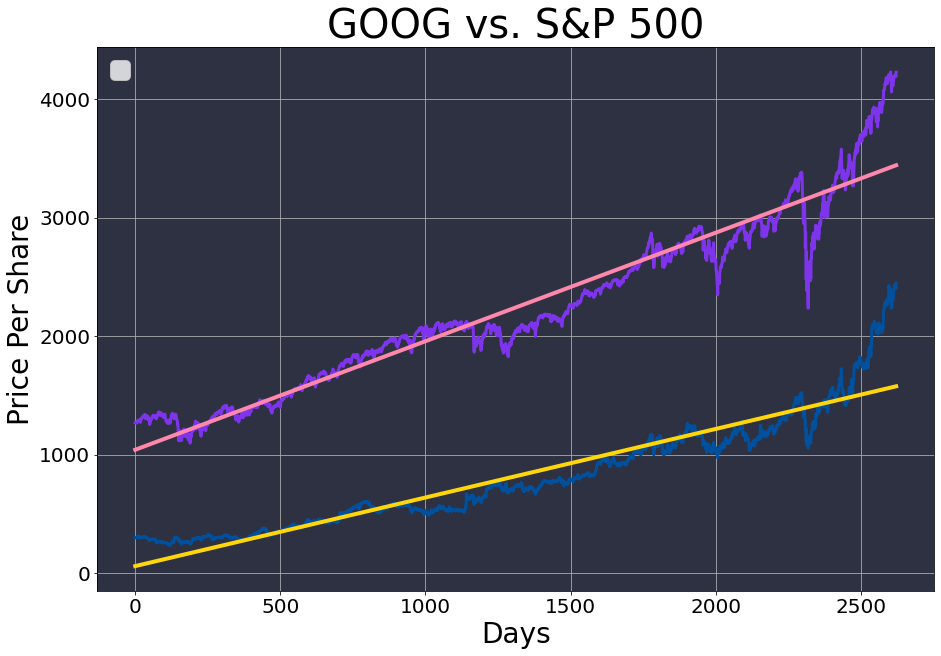

No handles with labels found to put in legend.


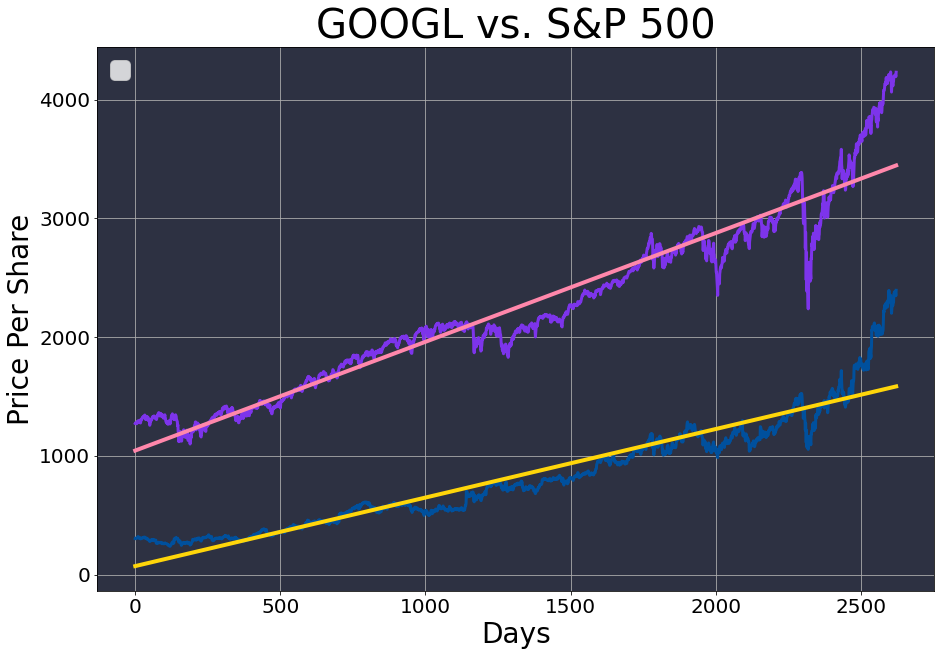

No handles with labels found to put in legend.


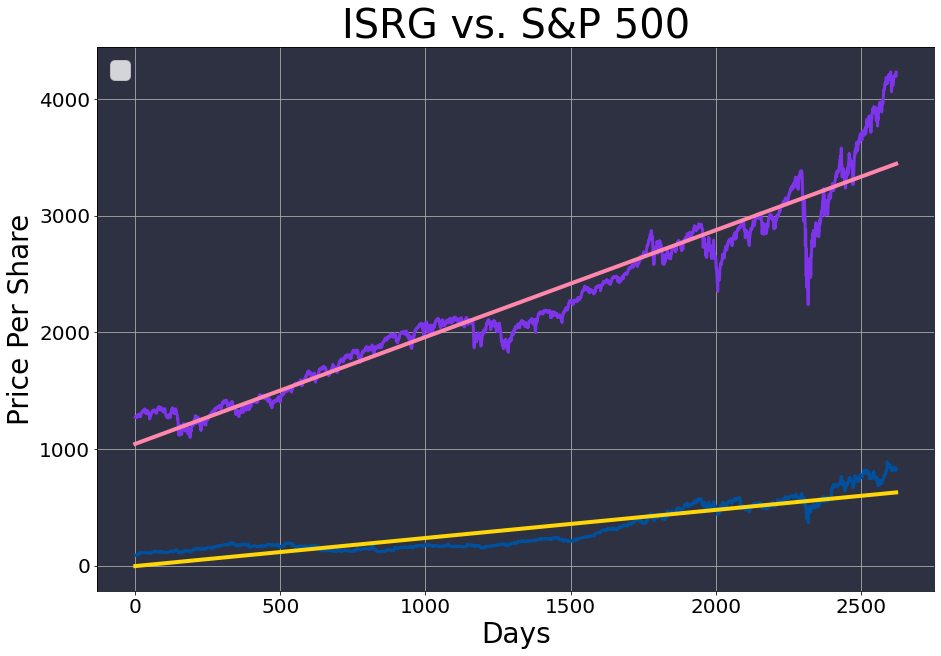

No handles with labels found to put in legend.


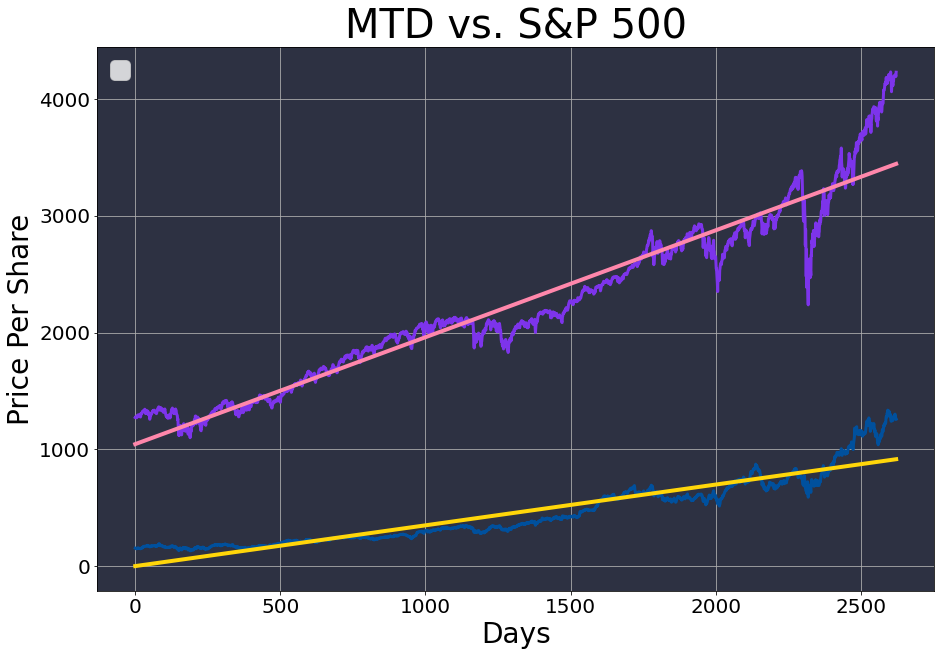

No handles with labels found to put in legend.


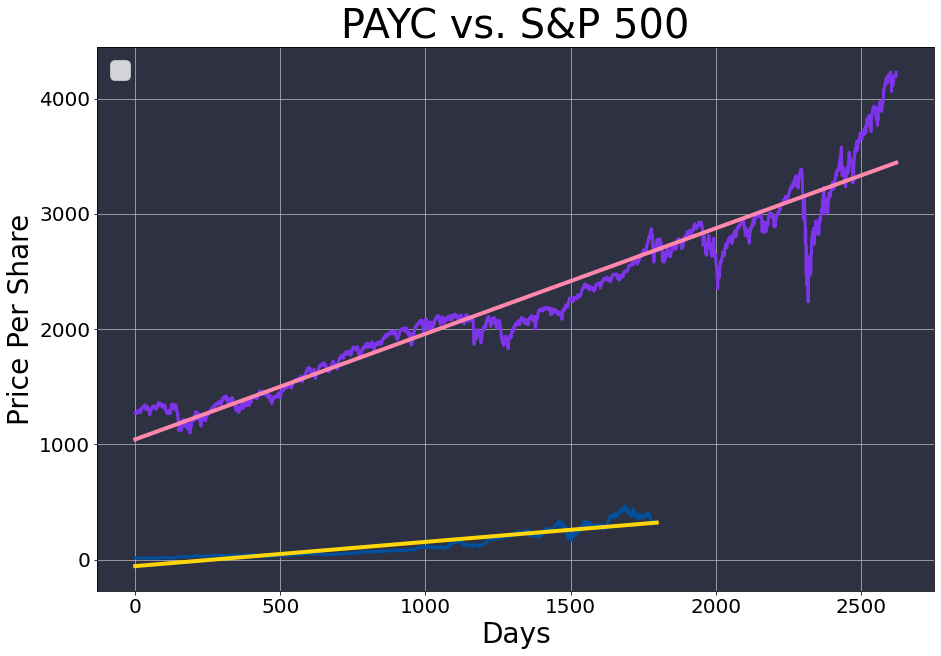

In [98]:
### PLOTS FOR RUNNER-UP STOCKS
folder_stocks = "resources/data_history_stocks"
folder_market = "resources/data_history_market"

for file in Path(folder_stocks).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in runnerupstocks_tickerlist:
            #print(file_name)
            ## DataFrame for all historical stocks data for each stock
            runnerstocks_plots_df = pd.read_csv(file)
            runnerstocks_plots_df.rename(columns={"Unnamed: 0": "Day Number", 
                                               "Date": "Date", 
                                               "Close": "Price"}, inplace = True)
    
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            runnerstocks_plots_model = LinearRegression()
            runnerstocks_plots_model.fit(np.array(runnerstocks_plots_df["Day Number"]).reshape(-1,1), runnerstocks_plots_df["Price"])
            runnerstocks_plots_slope = runnerstocks_plots_model.coef_
            runnerstocks_plots_intercept = runnerstocks_plots_model.intercept_
            runnerstocks_plots_score = runnerstocks_plots_model.score(np.array(runnerstocks_plots_df["Day Number"]).reshape(-1,1), runnerstocks_plots_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            runnerstocks_regression = [runnerstocks_plots_slope * day + runnerstocks_plots_intercept for day in runnerstocks_plots_df["Day Number"]]
                        ## Plot market data and market regression line and save graph to image file
            plt.figure(figsize=(15,10))
            ax = plt.axes()
            # Setting the background color
            ax.set_facecolor("#2d3142")
           # plt.rcParams.update({'font.size': 22})
            plt.plot(runnerstocks_plots_df["Day Number"], runnerstocks_plots_df["Price"], c="#00509d", linewidth=3)
            plt.plot(runnerstocks_plots_df["Day Number"], runnerstocks_regression, c="#ffd60a", linewidth=4)
            plt.plot(market_df["Day Number"], market_df["Price"], c="#7d34eb", linewidth=3)
            plt.plot(market_df["Day Number"], market_regression, c="#ff87ab", linewidth=4)
            plt.title(f"{file_name} vs. S&P 500")
            plt.xlabel("Days")
            plt.ylabel("Price Per Share")
            plt.grid()
            ax.legend(loc="upper left")
            plt.savefig(f"static/img/runnerup_stocks/{file_name}_plot.png")
            plt.show()
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


### On one graph for each 10 Worst Stocks, plot:
#### - Historical Stock Data and Stock Regression line 
#### - Historical Market Data and Market Regression line

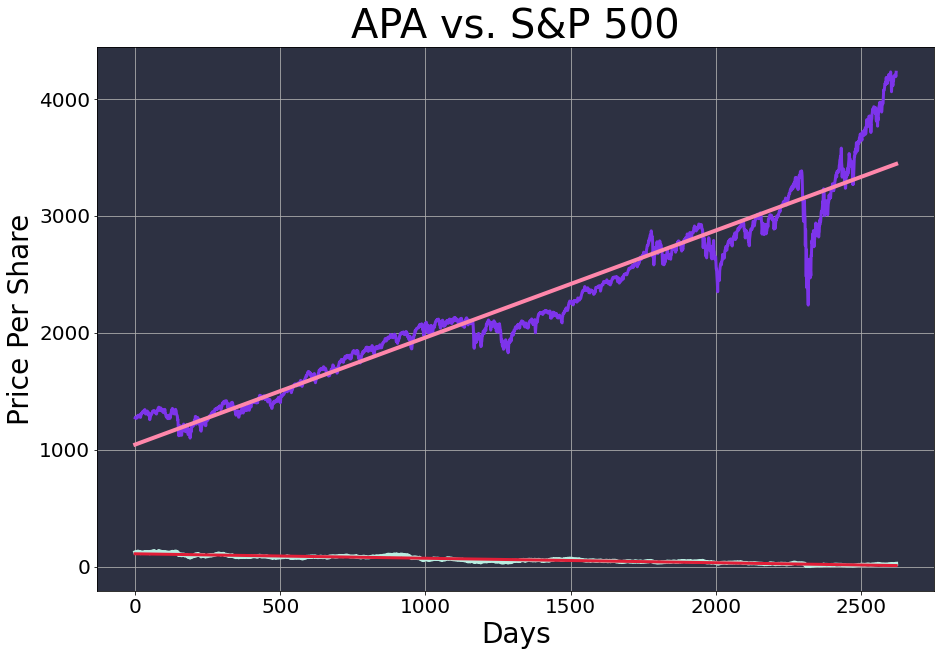

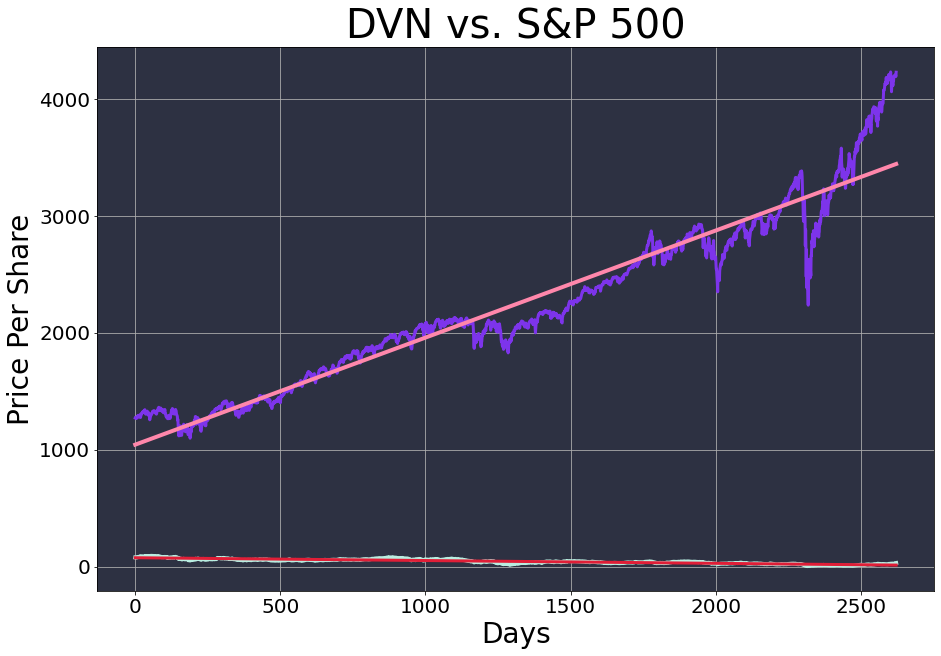

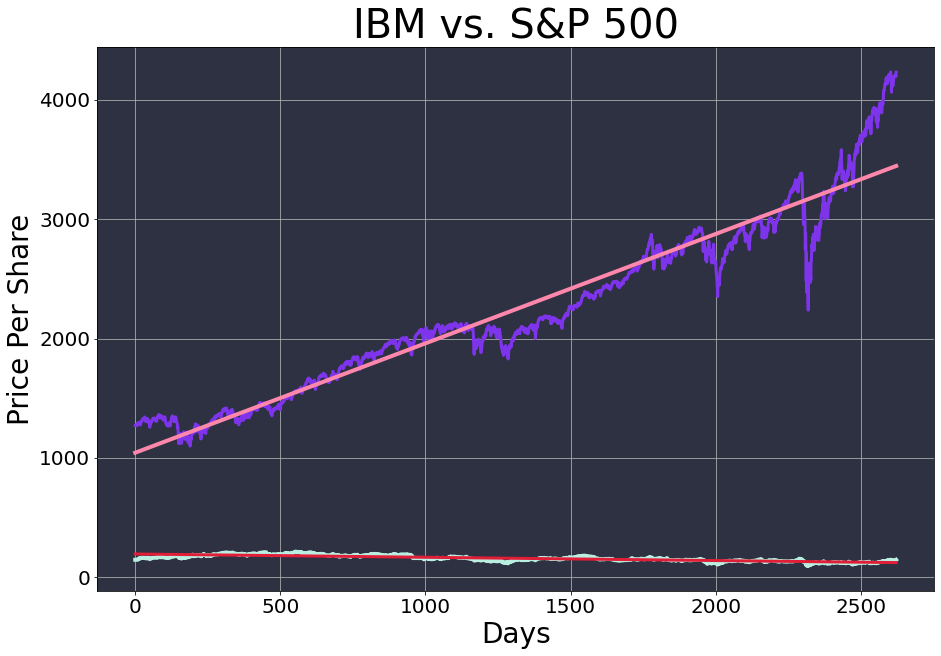

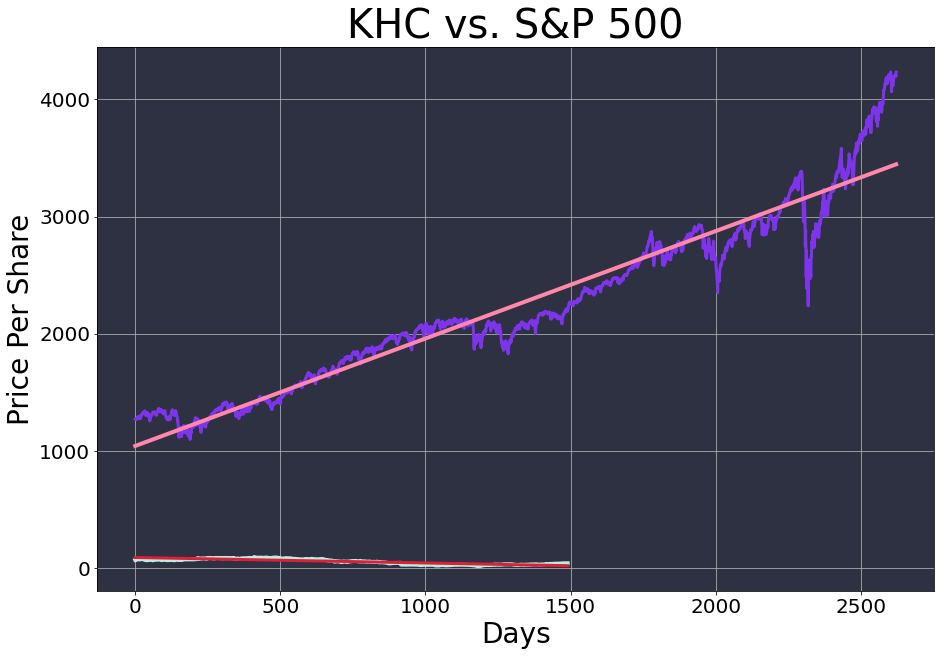

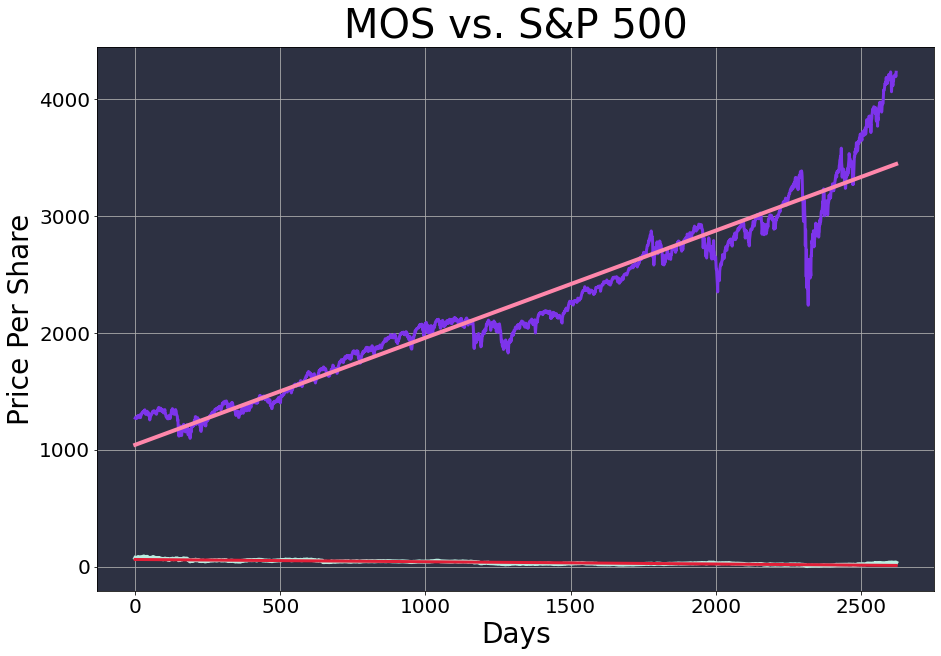

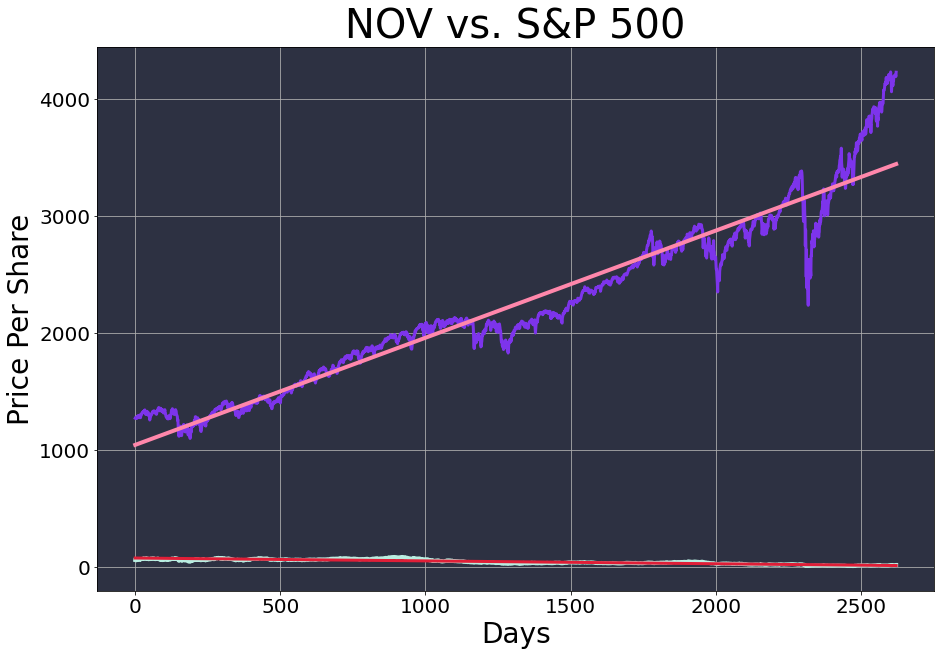

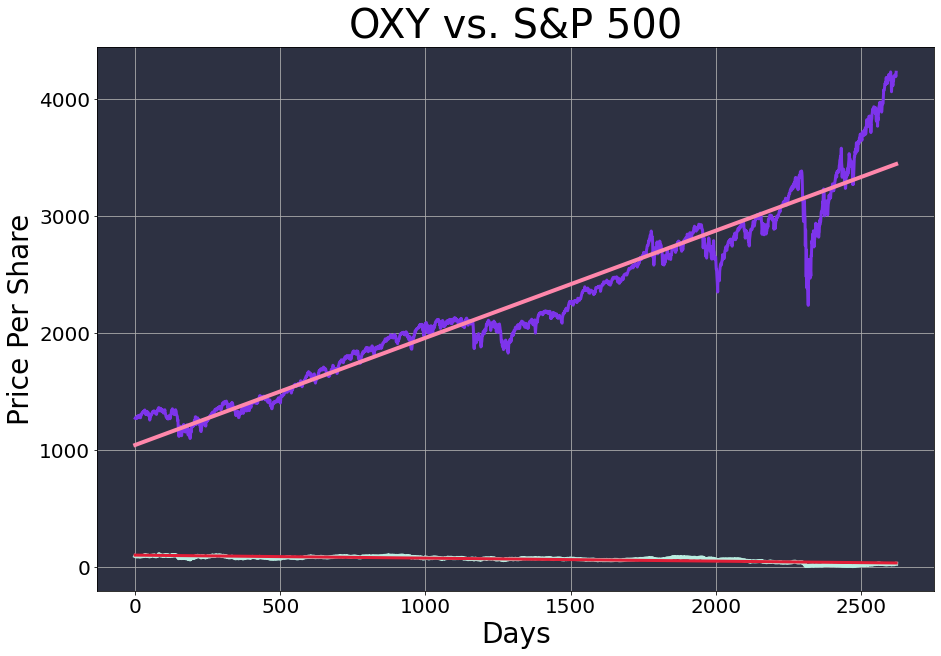

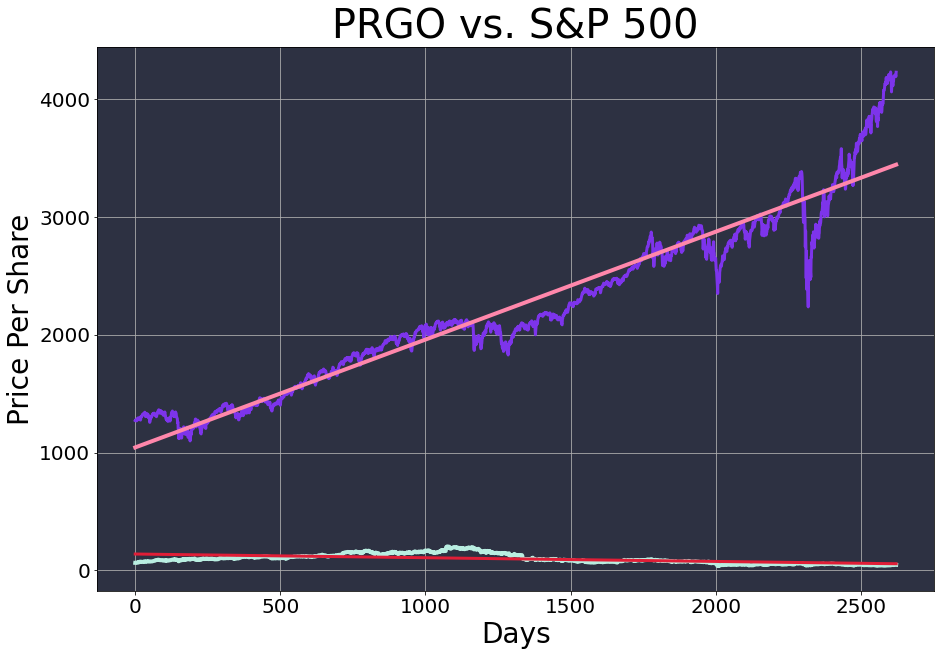

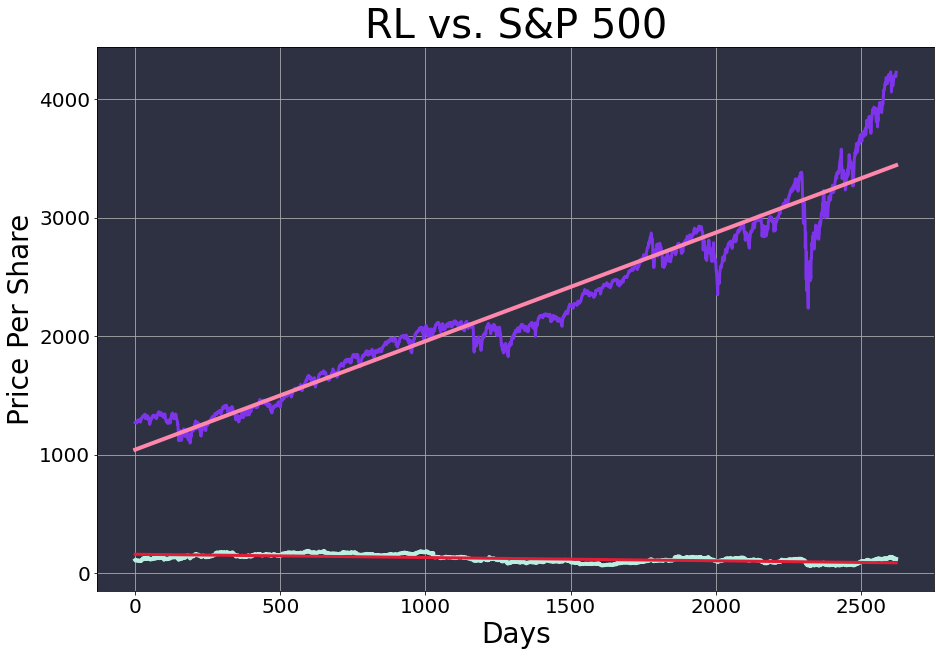

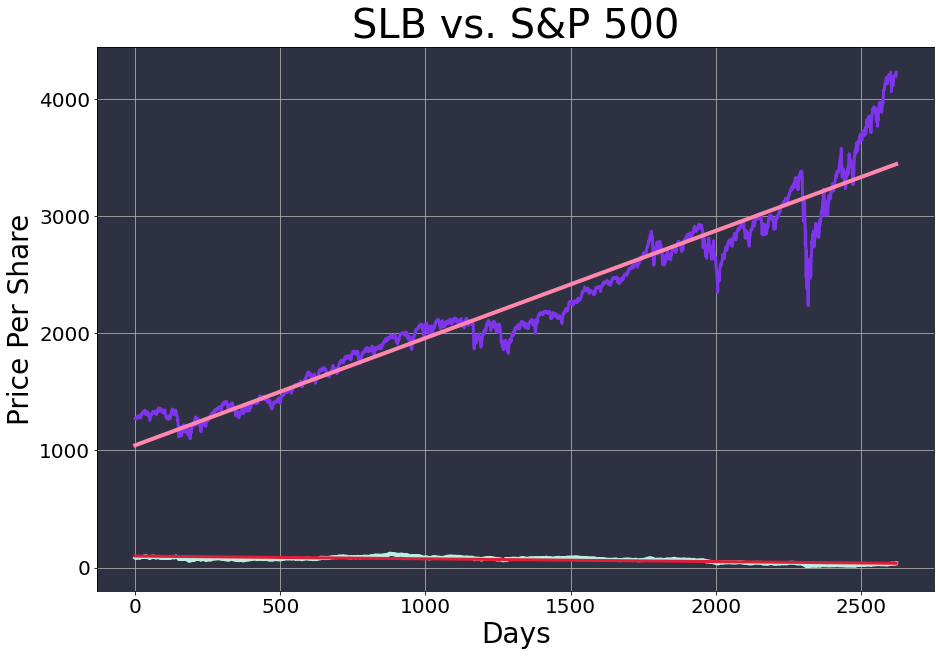

In [94]:
### PLOTS FOR WORST STOCKS
folder_stocks = "resources/data_history_stocks"
folder_market = "resources/data_history_market"

for file in Path(folder_stocks).glob("*.csv"):
    try:
        file_name = str(file).replace('.csv','').replace('resources\\data_history_stocks\\','')
        if file_name in worststocks_tickerlist:
            #print(file_name)
            ## DataFrame for all historical stocks data for each stock
            allstocks_plots_df = pd.read_csv(file)
            allstocks_plots_df.rename(columns={"Unnamed: 0": "Day Number", 
                                               "Date": "Date", 
                                               "Close": "Price"}, inplace = True)
    
            ## Use linear regression to find slope, y intercept, and regression of historical market data
            allstocks_plots_model = LinearRegression()
            allstocks_plots_model.fit(np.array(allstocks_plots_df["Day Number"]).reshape(-1,1), allstocks_plots_df["Price"])
            allstocks_plots_slope = allstocks_plots_model.coef_
            allstocks_plots_intercept = allstocks_plots_model.intercept_
            allstocks_plots_score = allstocks_plots_model.score(np.array(allstocks_plots_df["Day Number"]).reshape(-1,1), allstocks_plots_df["Price"])
            file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
            
            ## Calculate regression line of stocks
            ## Append all stock results to lists
            allstocks_regression = [allstocks_plots_slope * day + allstocks_plots_intercept for day in allstocks_plots_df["Day Number"]]
                        ## Plot market data and market regression line and save graph to image file
            plt.figure(figsize=(15,10))
            ax = plt.axes()
            # Setting the background color
            ax.set_facecolor("#2d3142")
           # plt.rcParams.update({'font.size': 22})
            plt.plot(allstocks_plots_df["Day Number"], allstocks_plots_df["Price"], c="#b9eee1", linewidth=4)
            plt.plot(allstocks_plots_df["Day Number"], allstocks_regression, c="#e01e37", linewidth=3)
            plt.plot(market_df["Day Number"], market_df["Price"], c="#7d34eb", linewidth=3)
            plt.plot(market_df["Day Number"], market_regression, c="#ff87ab", linewidth=4)
            plt.title(f"{file_name} vs. S&P 500")
            plt.xlabel("Days")
            plt.ylabel("Price Per Share")
            plt.grid()
            plt.savefig(f"static/img/worst_stocks/{file_name}_plot.png")
            plt.show()
        else:
            pass
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1


In [ ]:
## Plot market data and market regression line and save graph to image file
plt.figure(figsize=(30,15))
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad", linewidth=5)
plt.plot(market_df["Day Number"], market_regression, c="#ff6a00", linewidth=6)
###### Will need to format graph and save to image file ######
# plt.savefig("static/img/data_history_reg_market.png")
# plt.show()

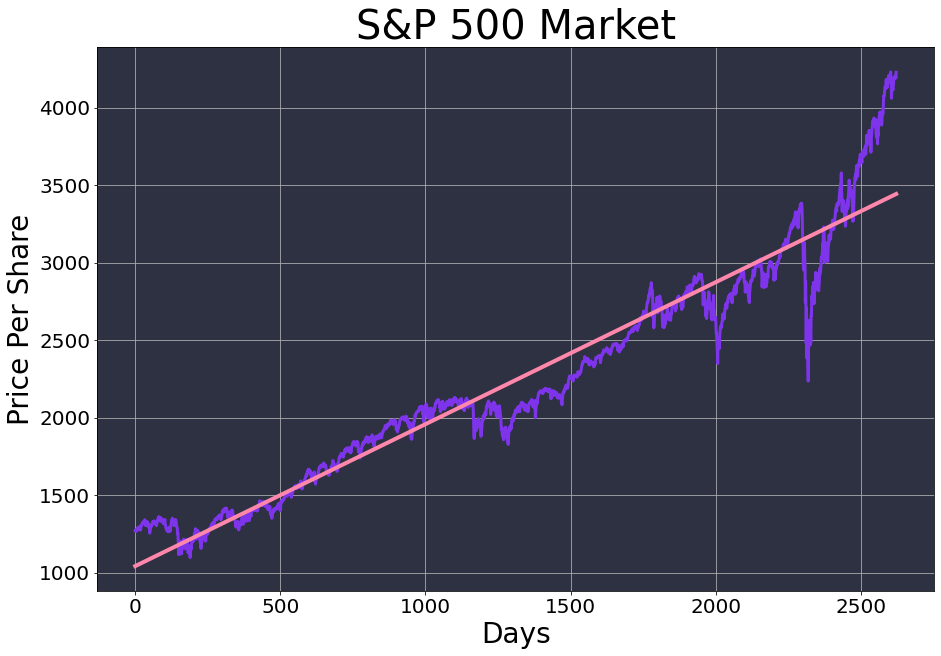

In [99]:
plt.figure(figsize=(15,10))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("#2d3142")
plt.plot(market_df["Day Number"], market_df["Price"], c="#7d34eb", linewidth=3)
plt.plot(market_df["Day Number"], market_regression, c="#ff87ab", linewidth=4)
plt.title("S&P 500 Market")
plt.xlabel("Days")
plt.ylabel("Price Per Share")
plt.grid()
plt.savefig("static/img/market_plot.png")
plt.show()

In [ ]:
error_log.close()
print(f"Encountered {error_count} errors")

In [ ]:
#### Need to format/cleanup the graphs to look professional before exporting to image files
#### Need graphs and export graphs as images for: winning stocks, worst stocks, and runnerup stocks